In [1]:
# libraries used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime

%matplotlib inline

# needed for treemap graphic
!pip install squarify 
import squarify

print("loaded libraries")

loaded libraries


In [2]:
# load up csv files

github_url = "https://raw.githubusercontent.com/werntzp/hockey-stats/master/"

df_games = pd.read_csv(github_url + "games.csv") 
df_shots = pd.read_csv(github_url + "shots.csv") 
df_goals = pd.read_csv(github_url + "goals.csv") 
df_periods = pd.read_csv(github_url + "periods.csv")
df_penalties = pd.read_csv(github_url + "penalties.csv") 
df_points = pd.read_csv(github_url + "points.csv")

print("loaded csv files")

loaded csv files


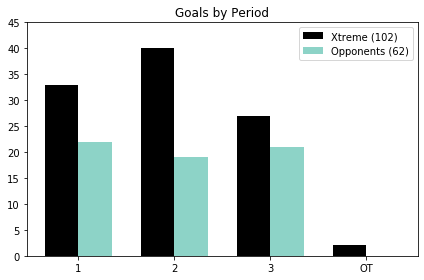

In [3]:
# bar chart with goals per period

p1xg = df_goals[(df_goals.team == "a") & (df_goals.period == 1)].shape[0]
p2xg = df_goals[(df_goals.team == "a") & (df_goals.period == 2)].shape[0]
p3xg = df_goals[(df_goals.team == "a") & (df_goals.period == 3)].shape[0]
p4xg = df_goals[(df_goals.team == "a") & (df_goals.period == 4)].shape[0]

p1og = df_goals[(df_goals.team == "o") & (df_goals.period == 1)].shape[0]
p2og = df_goals[(df_goals.team == "o") & (df_goals.period == 2)].shape[0]
p3og = df_goals[(df_goals.team == "o") & (df_goals.period == 3)].shape[0]
p4og = df_goals[(df_goals.team == "o") & (df_goals.period == 4)].shape[0]

labels = ['1', '2', '3', 'OT']
xtreme = [p1xg, p2xg, p3xg, p4xg]
opponent = [p1og, p2og, p3og, p4og]

x_label = "Xtreme (" + str(p1xg + p2xg + p3xg + p4xg) + ")"
o_label = "Opponents (" + str(p1og + p2og + p3og + p4og) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#8dd3c7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Goals by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 50, 5))

plt.show()

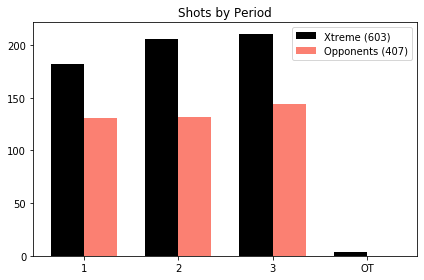

In [4]:
# bar chart with shots per period

p1xs = df_shots['ashburn_p1'].sum()
p2xs = df_shots['ashburn_p2'].sum()
p3xs = df_shots['ashburn_p3'].sum()
p4xs = df_shots['ashburn_ot'].sum()

p1os = df_shots['opp_p1'].sum()
p2os = df_shots['opp_p2'].sum()
p3os = df_shots['opp_p3'].sum()
p4os = df_shots['opp_ot'].sum()

labels = ['1', '2', '3', 'OT']
xtreme = [p1xs, p2xs, p3xs, p4xs]
opponent = [p1os, p2os, p3os, p4os]

x_label = "Xtreme (" + str(p1xs + p2xs + p3xs + p4xs) + ")"
o_label = "Opponents (" + str(p1os + p2os + p3os + p4os) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#fb8072')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Shots by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 250, 50))

plt.show()


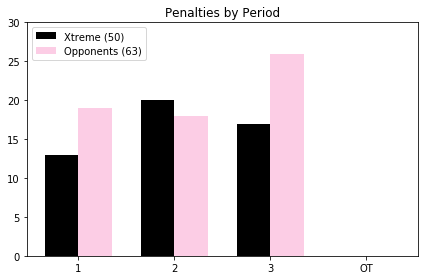

In [23]:
# bar chart comparing xtreme and opponent penalties by period

p1xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 1)].shape[0]
p2xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 2)].shape[0]
p3xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 3)].shape[0]
p4xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 4)].shape[0]

p1op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 1)].shape[0]
p2op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 2)].shape[0]
p3op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 3)].shape[0]
p4op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 4)].shape[0]

labels = ['1', '2', '3', 'OT']
xtreme = [p1xp, p2xp, p3xp, p4xp]
opponent = [p1op, p2op, p3op, p4op]

x_label = "Xtreme (" + str(p1xp + p2xp + p3xp + p4xp) + ")"
o_label = "Opponents (" + str(p1op + p2op + p3op + p4op) + ")"

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#fccde5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Penalties by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 35, 5))

plt.show()

In [8]:
# treemap with penalty types 

fig = go.Figure()

x = 0.
y = 0.
width = 100.
height = 100.

# get unique list of xtreme penalty types
dfx = df_penalties[(df_penalties.team == "a")]
arr = dfx.type.unique()

p_values = []
p_labels = []

# loop through names and count up number of times they occured
for p in arr:
  c = dfx[(dfx.type == p)].shape[0]
  p_values.append(c)
  p_labels.append(p + " (" + str(c) + ")")

normed = squarify.normalize_sizes(p_values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['rgb(141,211,199)','rgb(255,255,179)','rgb(190,186,218)','rgb(251,128,114)','rgb(128,177,211)','rgb(253,180,98)','rgb(179,222,105)','rgb(252,205,229)','rgb(217,217,217)']

# other colors if have more than 8 penalty types ... , rgb(188,128,189), rgb(204,235,197)

shapes = []
annotations = []
counter = 0

for r, val, color, lbl in zip(rects, p_values, color_brewer, p_labels):
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x']+r['dx'],
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = lbl,
            showarrow = False
        )
    )

# For hover text
fig.add_trace(go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ],
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in p_values ],
    mode = 'text',
))

fig.update_layout(
    height=700,
    width=700,
    xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    yaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    title=go.layout.Title(
        text="Xtreme Penalty Types",
        xref="paper",
        x=0
    )
)

fig.show()

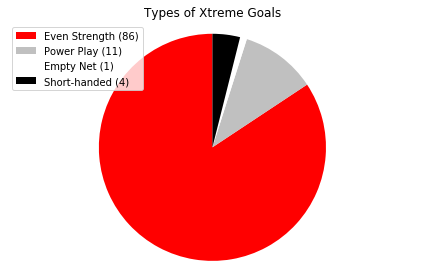

In [9]:
# Pie chart with goal types

# dictionary with goal types 
goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "a")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#ff0000','#c0c0c0','#ffffff','#000000']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Xtreme Goals')
plt.tight_layout()
plt.show()

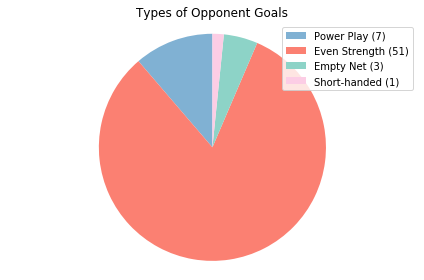

In [10]:
# Pie chart with goal types

# dictionary with goal types 
#goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "o")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#80b1d3','#fb8072','#8dd3c7','#fccde5']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Opponent Goals')
plt.tight_layout()
plt.show()

In [25]:
# calculate how many times Xtreme scored first 

dfx = pd.DataFrame(columns=["game",	"team",	"period",	"time",	"type"])

num_games = df_games.shape[0]

# build dataframe where xtreme scored first 
for g in range(1,num_games+1):
    t = df_goals[(df_goals.game == g)].head(1)
    dfx = pd.concat([t, dfx[:]])

# loop through it to get their record 
x_win = 0 
x_loss = 0 
x_tie = 0 

dft = dfx[(dfx.team == "a")]

for idx in dft.index:
    # for each game, determine if Xtreme won or lost
    g = dft["game"][idx]
    # go get score for each game 
    if ((df_games[(df_games.game == g)].axscore.iloc[0]) > (df_games[(df_games.game == g)].oppscore.iloc[0])):
      x_win = x_win + 1
    elif ((df_games[(df_games.game == g)].axscore.iloc[0]) < (df_games[(df_games.game == g)].oppscore.iloc[0])):
      x_loss = x_loss + 1
    else: 
      x_tie = x_tie + 1

print("The Xtreme have scored first " + str(dfx[(dfx.team == "a")].shape[0]) + " times and they are " + 
      str(x_win) + "-" + str(x_loss) + "-" + str(x_tie) + " in those games.")


The Xtreme have scored first 15 times and they are 12-2-1 in those games.


In [28]:
# calculate power play percentage (calculated by dividing power play goals by power play opportunities)

ppg = df_goals[(df_goals.team == "a") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "o")].shape[0]
pp = '{0:.0f}'.format((ppg / ppo * 100))
print("The Xtreme power play percentage is " + str(pp) + "%.")


The Xtreme power play percentage is 17%.


In [27]:
# calculate penalty kill percentage (calculated by subtracting power play goals against from power 
#play opportunities against, then dividing by power play opportunities against.)

ppg = df_goals[(df_goals.team == "o") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "a")].shape[0]
pp = '{0:.0f}'.format(((ppo - ppg) / ppo * 100))
print("The Xtreme penalty kill percentage is " + str(pp) + "%.")


The Xtreme penalty kill percentage is 86%.


In [16]:
# calculate average shots per game (xtreme and opponents) 

num_games = df_games.shape[0]

x_shots = (df_shots['ashburn_p1'].sum() + df_shots['ashburn_p2'].sum() + 
           df_shots['ashburn_p3'].sum() + df_shots['ashburn_ot'].sum())

o_shots = (df_shots['opp_p1'].sum() + df_shots['opp_p2'].sum() + 
           df_shots['opp_p3'].sum() + df_shots['opp_ot'].sum())

x_avg_shots = '{0:.0f}'.format(x_shots / num_games * 1) # round to whole number .0f
o_avg_shots = '{0:.0f}'.format(o_shots / num_games * 1) # round to whole number .0f

print("The Xtreme are averaging " + str(x_avg_shots) + " shots per game while opponents are averaging " +
      str(o_avg_shots) + ".")

The Xtreme are averaging 25 shots per game while opponents are averaging 17.


In [30]:
# calculate how many periods xtreme have scored in 

num_games = df_games.shape[0]

periods_scored = 0 
for g in range(1,num_games+1): 
  dfx = df_goals[(df_goals.game == g) & (df_goals.team == "a")]
  periods = dfx["period"].unique().size
  periods_scored = periods_scored + periods

# count # periods where > 0 
total_periods = 0 
for g in range(1,num_games+1): 
  for p in range(1,5):
    period_num = "p" + str(p) + "_length"
    period_length = df_periods.loc[df_periods.game == g, period_num].iloc[0]
    if (period_length > 0):
      total_periods = total_periods + 1

ps = '{0:.0f}'.format(periods_scored / total_periods * 100)

print("The Xtreme have scored in " + str(periods_scored) + " out of " + str(total_periods) + " periods (" + 
      str(ps) + "%).")


The Xtreme have scored in 53 out of 74 periods (72%).


In [18]:
# calculate when we give up a goal within 1 minute or 2 of scoring one 
# find an xtreme goal, see if next one is opponent, then subtract time? 

# use a counter
ctr = 0 

# use one minute as threshold
threshold = datetime.timedelta(minutes=1)

# get all xtreme goals 
dfx = df_goals[(df_goals.team == "a")]

# loop through each one
for x in range(1, dfx.shape[0]+1):
    try: 
        # current goal is ashburn
        curr_goal = dfx.iloc[x]
        # next goal is whatever the next one is 
        next_goal = df_goals.iloc[curr_goal.name+1]
        # need to verify next goal occured in the same game, same period, and was scored by opponet
        if ((next_goal[0] == curr_goal[0]) & (next_goal[1] == "o") & (next_goal[2] == curr_goal[2])):
            # now, grab time of ashburn goal and opponent goal 
            [x1_min, x1_sec] = [int(x) for x in curr_goal[3].split(':')]
            a_goal_time = datetime.timedelta(minutes=x1_min, seconds=x1_sec)
            [x2_min, x2_sec] = [int(x) for x in next_goal[3].split(':')]
            o_goal_time = datetime.timedelta(minutes=x2_min, seconds=x2_sec)
            # subtract to get time differential and see if below the threshold
            time_diff = a_goal_time - o_goal_time
            if (time_diff < threshold):
              #print(next_goal)
              # increment the counter
              ctr = ctr + 1
    except:
        print("")
        
#print out the result
print("Opponents have sored " + str(ctr) + " times within one minute of the Xtreme scoring a goal.")




Opponents have sored 8 times within one minute of the Xtreme scoring a goal.


In [20]:
# calculate shooting percentage (goals / shots on goal)

x_goals = df_goals[(df_goals.team == "a")].shape[0]
x_shots = (df_shots['ashburn_p1'].sum() + df_shots['ashburn_p2'].sum() + 
           df_shots['ashburn_p3'].sum() + df_shots['ashburn_ot'].sum())

sp = '{0:.2f}'.format(int(x_goals) / int(x_shots) * 100)
print("The Xtreme shooting percentage is " + str(sp) + "%.")



The Xtreme shooting percentage is 16.92%.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning:

Second argument '3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



Text(0.5, 0.94, 'Points per Player by Game')

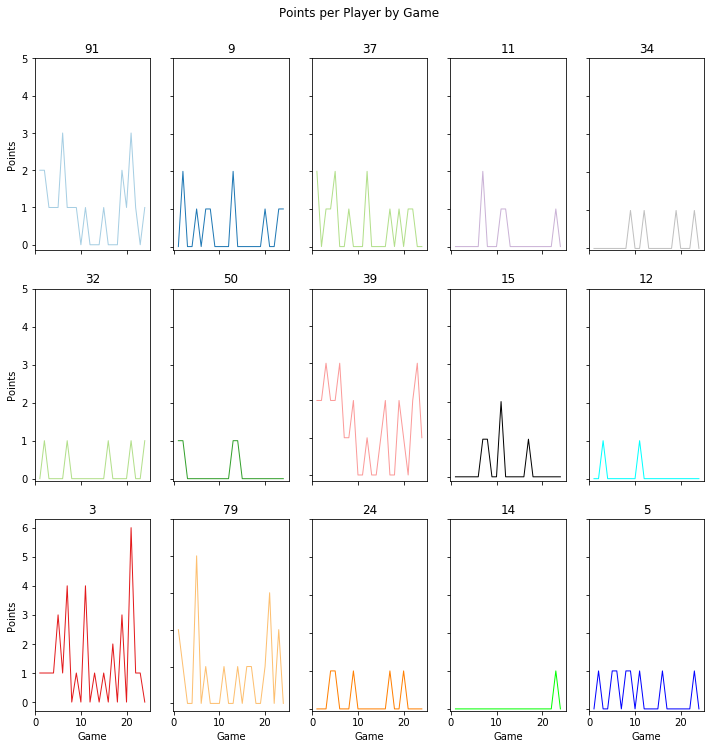

In [21]:
# Show points per game (multiple plots)

num_games = df_games.shape[0]

# only use whole numbers
ytick = [0,1,2,3,4,5]
xtick = range(1,num_games+1) 

# setup multiple plots
fig, axs = plt.subplots(3, 5)

axs[0, 0].plot( 'game', '91', data=df_points, marker='', color='#a6cee3', linewidth=1)
axs[0, 0].set_title('91')
axs[0, 0].set_yticks(ytick,ytick)

axs[0, 1].plot( 'game', '9', data=df_points, marker='', color='#1f78b4', linewidth=1)
axs[0, 1].set_title('9')
axs[0, 1].set_yticks(ytick,ytick)

axs[0, 2].plot( 'game', '37', data=df_points, marker='', color='#b2df8a', linewidth=1)
axs[0, 2].set_title('37')
axs[0, 2].set_yticks(ytick,ytick)

axs[0, 3].plot( 'game', '11', data=df_points, marker='', color='#cab2d6', linewidth=1)
axs[0, 3].set_title('11')
axs[0, 3].set_yticks(ytick,ytick)

axs[0, 4].plot( 'game', '34', data=df_points, marker='', color='#c0c0c0', linewidth=1)
axs[0, 4].set_title('34')
axs[0, 4].set_yticks(ytick,ytick)

axs[1, 0].plot( 'game', '32', data=df_points, marker='', color='#b2df8a', linewidth=1)
axs[1, 0].set_title('32')
axs[1, 0].set_yticks(ytick,ytick)

axs[1, 1].plot( 'game', '50', data=df_points, marker='', color='#33a02c', linewidth=1)
axs[1, 1].set_title('50')
axs[1, 1].set_yticks(ytick,ytick)

axs[1, 2].plot( 'game', '39', data=df_points, marker='', color='#fb9a99', linewidth=1)
axs[1, 2].set_title('39')
axs[1, 2].set_yticks(ytick,ytick)

axs[1, 3].plot( 'game', '15', data=df_points, marker='', color='#000000', linewidth=1)
axs[1, 3].set_title('15')
axs[1, 3].set_yticks(ytick,ytick)

axs[1, 4].plot( 'game', '12', data=df_points, marker='', color='#00ffff', linewidth=1)
axs[1, 4].set_title('12')
axs[1, 4].set_yticks(ytick,ytick)

axs[2, 0].plot('game', '3', data=df_points, marker='', color='#e31a1c', linewidth=1)
axs[2, 0].set_title('3')
axs[2, 0].set_yticks(ytick,ytick)

axs[2, 1].plot( 'game', '79', data=df_points, marker='', color='#fdbf6f', linewidth=1)
axs[2, 1].set_title('79')
axs[2, 1].set_yticks(ytick,ytick)

axs[2, 2].plot( 'game', '24', data=df_points, marker='', color='#ff7f00', linewidth=1)
axs[2, 2].set_title('24')
axs[2, 2].set_yticks(ytick,ytick)

axs[2, 3].plot( 'game', '14', data=df_points, marker='', color='#00ff00', linewidth=1)
axs[2, 3].set_title('14')
axs[2, 3].set_yticks(ytick,ytick)

axs[2, 4].plot( 'game', '5', data=df_points, marker='', color='#0000ff', linewidth=1)
axs[2, 4].set_title('5')
axs[2, 4].set_yticks(ytick,ytick)

for ax in axs.flat:
    ax.set(xlabel='Game', ylabel='Points')

for ax in axs.flat:
    ax.label_outer()

fig.set_size_inches(12, 12)
fig.suptitle('Points per Player by Game', y=.94)


In [0]:
### *** OLD CHART, DO NOT USE *** ###

# stacked bar chart showing Xtreme goals/shots by period

p1g = df_goals[(df_goals.team == "a") & (df_goals.period == 1)].shape[0]
p2g = df_goals[(df_goals.team == "a") & (df_goals.period == 2)].shape[0]
p3g = df_goals[(df_goals.team == "a") & (df_goals.period == 3)].shape[0]
p4g = df_goals[(df_goals.team == "a") & (df_goals.period == 4)].shape[0]

p1s = df_shots['ashburn_p1'].sum()
p2s = df_shots['ashburn_p2'].sum()
p3s = df_shots['ashburn_p3'].sum()
p4s = df_shots['ashburn_ot'].sum()

N = 4
goals = (p1g, p2g, p3g, p4g)
shots = (p1s, p2s, p3s, p4s)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

g_label = "Goals (" + str(p1g + p2g + p3g + p4g) + ")"

p1 = plt.bar(ind, goals, width, color='red')
p2 = plt.bar(ind, shots, width, bottom=goals, color='black')

plt.title('Xtreme Goals and Shots by Period')
plt.xticks(ind, ('1', '2', '3', 'OT'))
plt.yticks(np.arange(0, 225, 10))
plt.legend((p1[0], p2[0]), (g_label, 'Shots'))

plt.show()